# Example Stitching Notebook

In [1]:
import os
import matplotlib.pyplot as plt
from sparcstools.stitch import Stitcher

/Users/sophia/mambaforge/envs/stitching/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### initializing the stitcher object

In [2]:
input_dir = os.path.join("../../../test_data/example1/raw_image_tiles/")
slidename = "stitching_test"
outdir = os.path.abspath(os.path.join("../../../test_data/example1/", slidename))

row = str(2).zfill(2) #specify the row of the well you want to stitch
well = str(4).zfill(2) #specifc the well number you wish to stitch
zstack_value = str(1).zfill(3) #specify the zstack you want to stitch. for multiple zstacks please make a loop and iterate through each of them.
timepoint = str(1).zfill(3) #specifz the timepoint you wish to stitch

pattern = f"Timepoint{timepoint}_Row{row}_Well{well}_{{channel}}_zstack{zstack_value}_r{{row:03}}_c{{col:03}}.tif"

#initialize stitcher
stitcher = Stitcher(input_dir, 
                    slidename, 
                    outdir, 
                    pattern =  pattern, 
                    stitching_channel = "Alexa488", 
                    overlap= 0.1, 
                    max_shift= 30,
                    filter_sigma = 0, 
                    rescale_range = {"Alexa488": (1, 99), "DAPI": (1, 99), "mCherry": (1, 99)},
                    overwrite=True)


Output directory  at /Users/sophia/Documents/GitHub/SPARCStools/test_data/example1/stitching_test already exists, overwriting.


### Generating thumbnails

In [3]:
stitcher.generate_thumbnail()

    assembling thumbnail 9/9


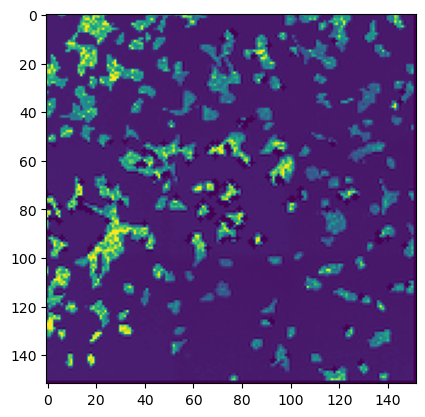

In [4]:
#thumbnail is saved in the stitcher object and can be accessed via stitcher.thumbnail
plt.imshow(stitcher.thumbnail)

In [5]:
#alterantively it can be saved to a tif file
stitcher.write_thumbnail()

### Generating full-scale stitched image

performing stitching on channel Alexa488 with id number 0
    quantifying alignment error 1000/1000
    aligning edge 12/12


Alignment complete.


  0%|          | 0/3 [00:00<?, ?it/s]

        merging tile 9/9

 33%|███▎      | 1/3 [00:01<00:02,  1.06s/it]


        merging tile 9/9

 67%|██████▋   | 2/3 [00:02<00:01,  1.07s/it]


        merging tile 9/9

100%|██████████| 3/3 [00:03<00:00,  1.07s/it]

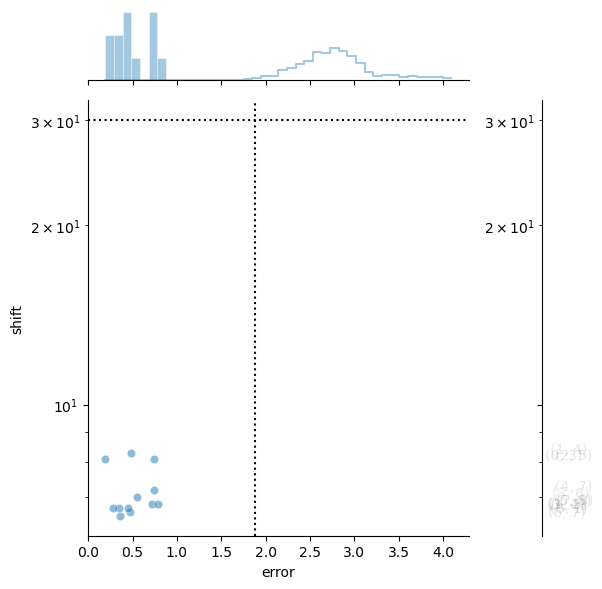

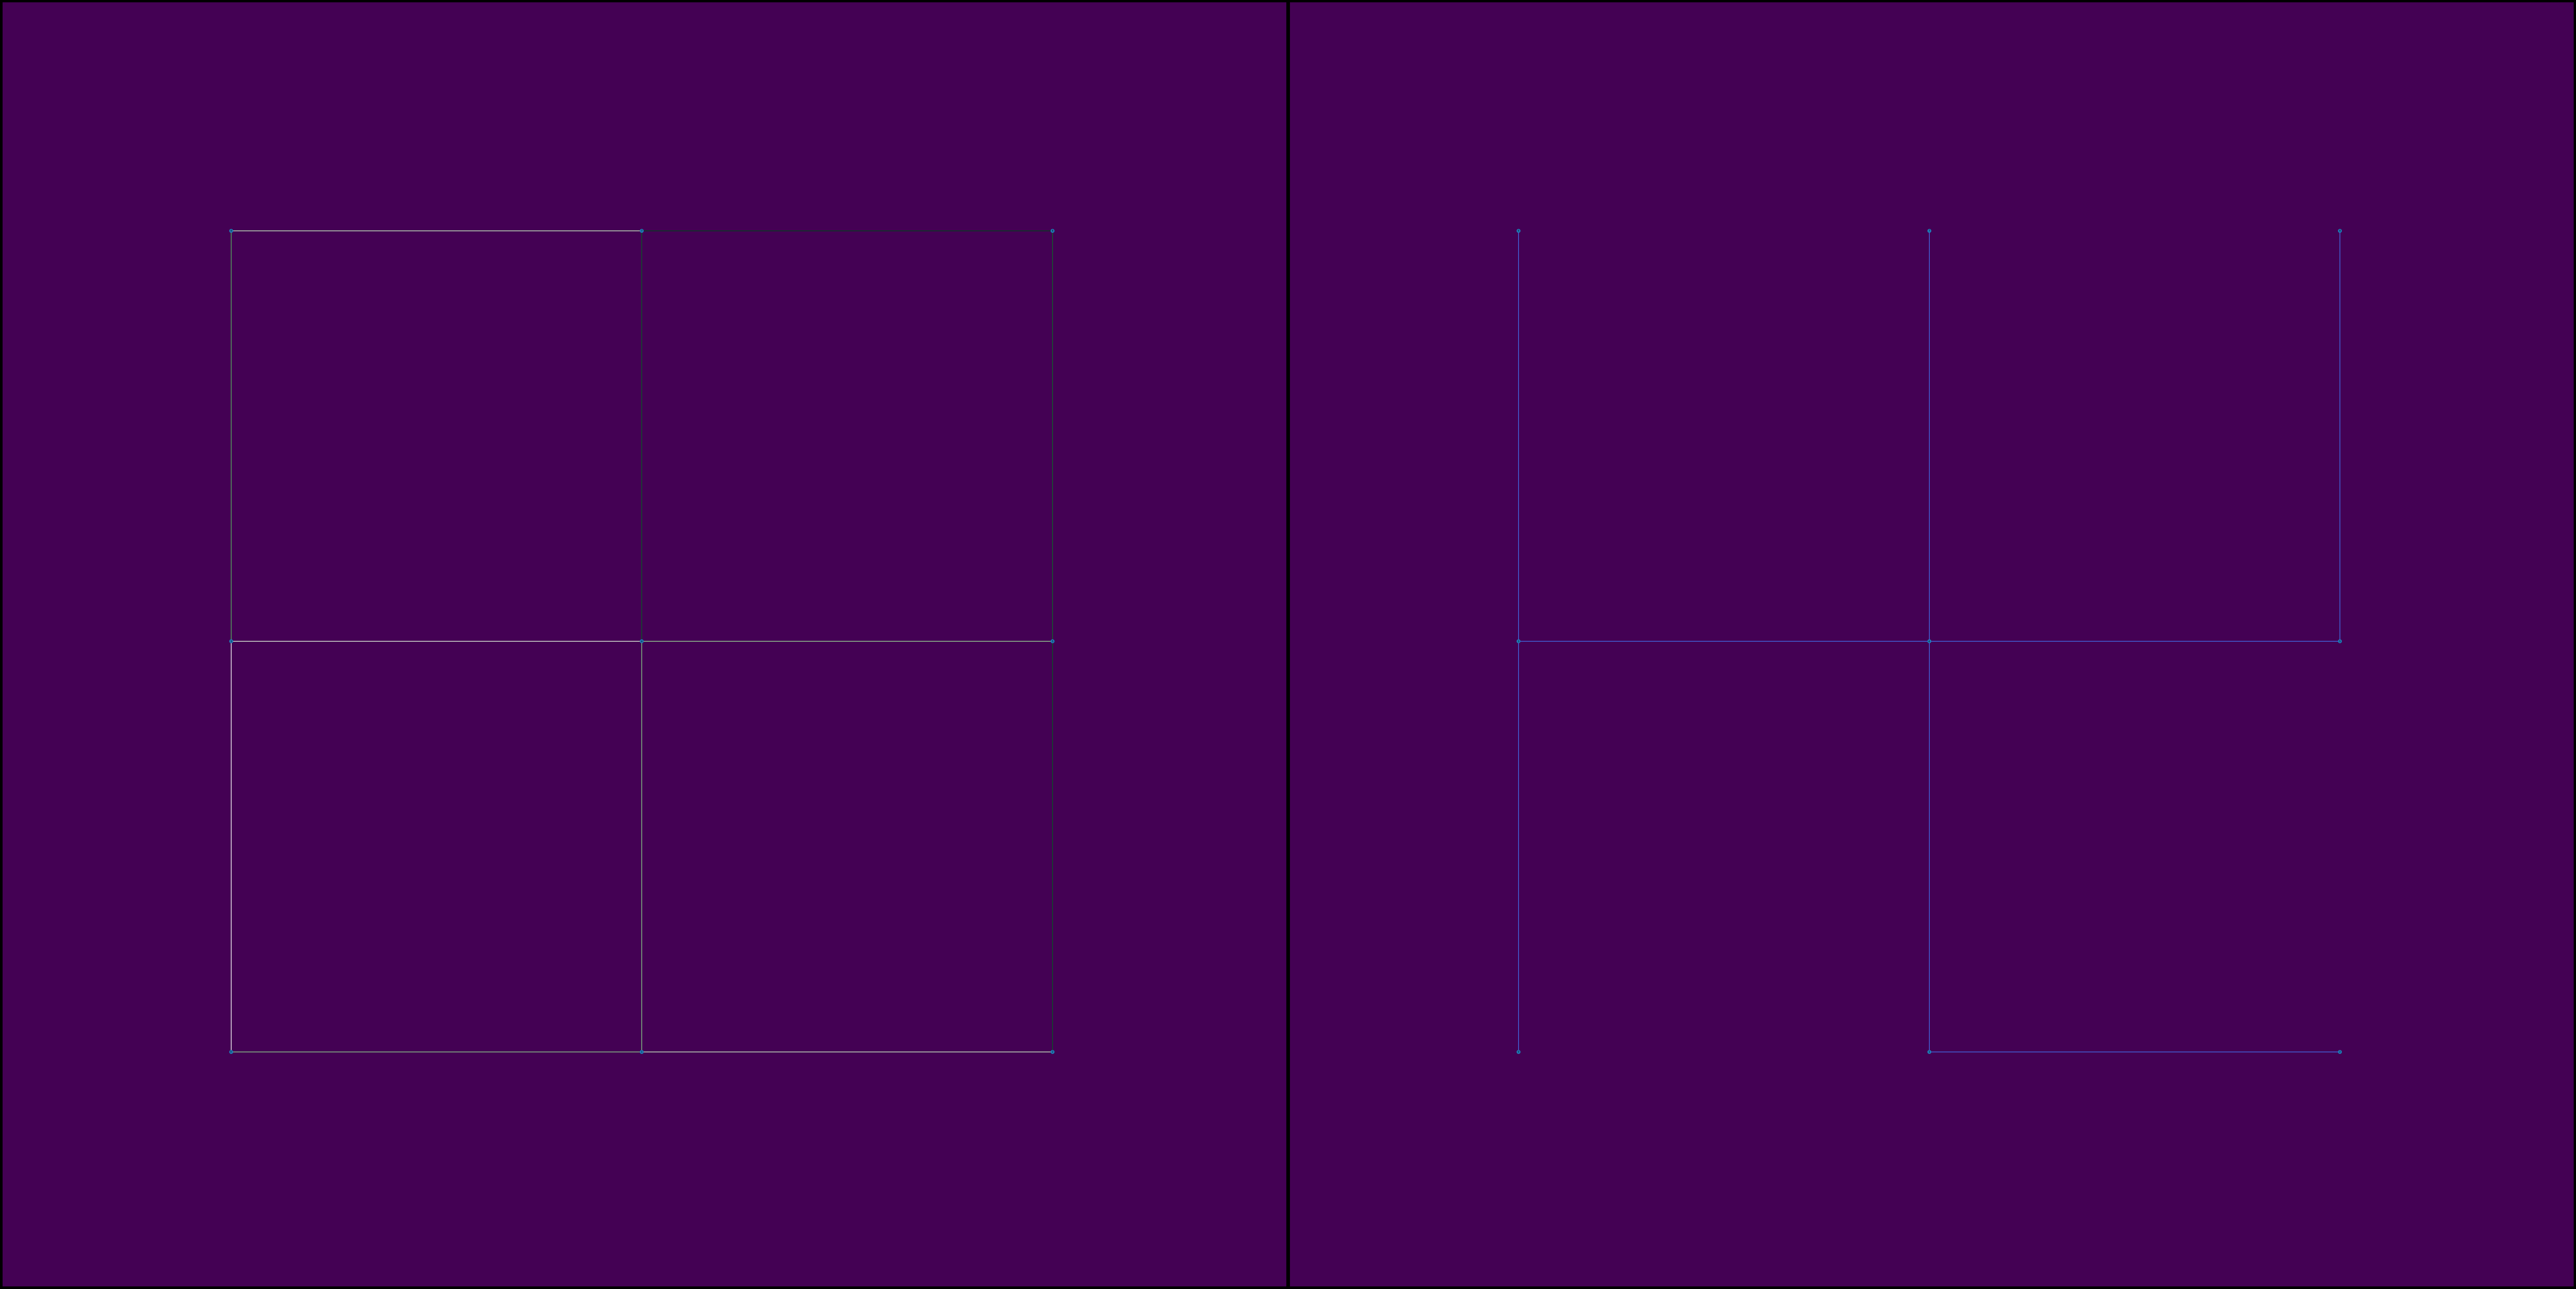

In [6]:
stitcher.stitch()

In [7]:
#the stitched image is saved in the stitcher object and can be accessed via stitcher.assembled_mosaic
stitcher.assembled_mosaic

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0, 522, 527, ..., 504, 486,   0],
        [  0, 526, 503, ..., 497, 479,   0],
        ...,
        [610, 573, 565, ..., 521, 549,   0],
        [566, 568, 555, ..., 539, 560,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0, 151, 133, ..., 162, 160,   0],
        [  0, 139, 150, ..., 174, 161,   0],
        ...,
        [170, 181, 177, ..., 198, 190,   0],
        [215, 196, 179, ..., 189, 173,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0, 163, 161, ..., 218, 226,   0],
        [  0, 169, 173, ..., 217, 215,   0],
        ...,
        [176, 183, 176, ..., 216, 187,   0],
        [183, 219, 187, ..., 195, 162,   0],
        [  0,   0,   0, ...,   0,   0,   0]]], dtype=uint16)

In [13]:
# the stitched image can then be written to a variety of output formats

stitcher.write_tif(export_xml=True)
stitcher.write_ome_zarr()

Outfile /Users/sophia/Documents/GitHub/SPARCStools/test_data/example1/stitching_test/stitching_test.ome.zarr already existed and was deleted.


## Visualize Stitching Output

(-0.5, 3037.5, 3039.5, -0.5)

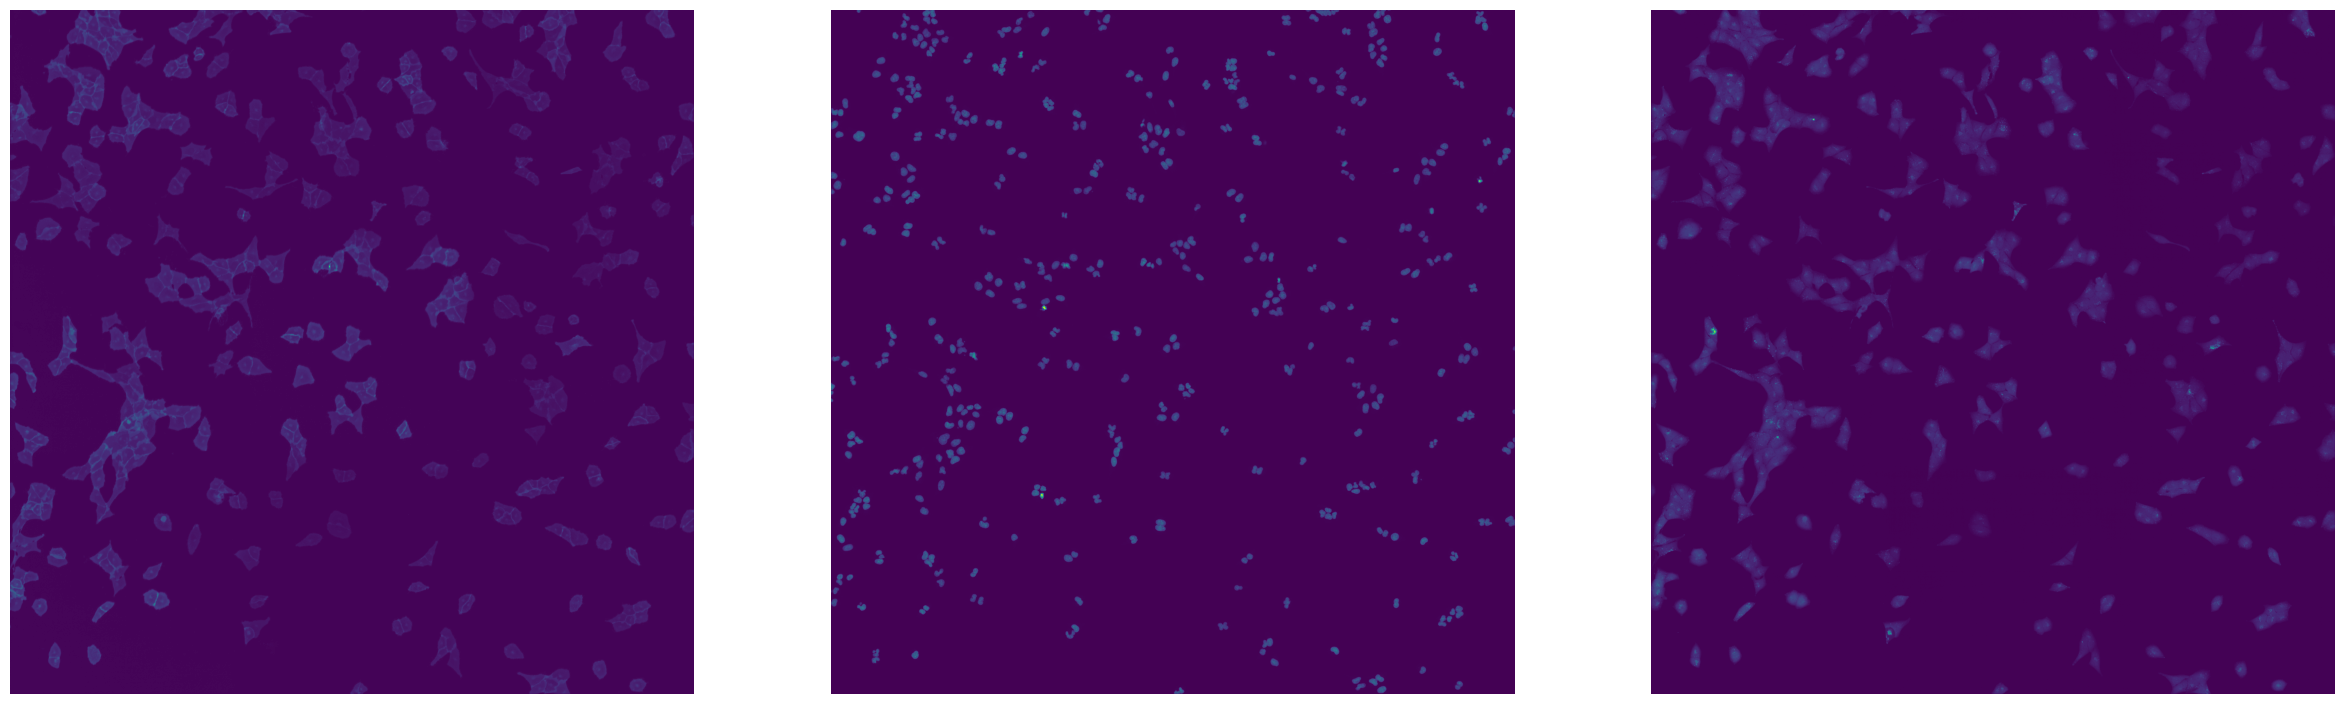

In [14]:
import matplotlib.pyplot as plt
from tifffile import imread

fig, axs = plt.subplots(1, 3, figsize = (30, 10))
axs[0].imshow(imread(f"{outdir}/stitching_test_Alexa488.tif"))
axs[0].axis("off")

axs[1].imshow(imread(f"{outdir}/stitching_test_DAPI.tif"))
axs[1].axis("off")

axs[2].imshow(imread(f"{outdir}/stitching_test_mCherry.tif"))
axs[2].axis("off")

(-0.5, 3037.5, 3039.5, -0.5)

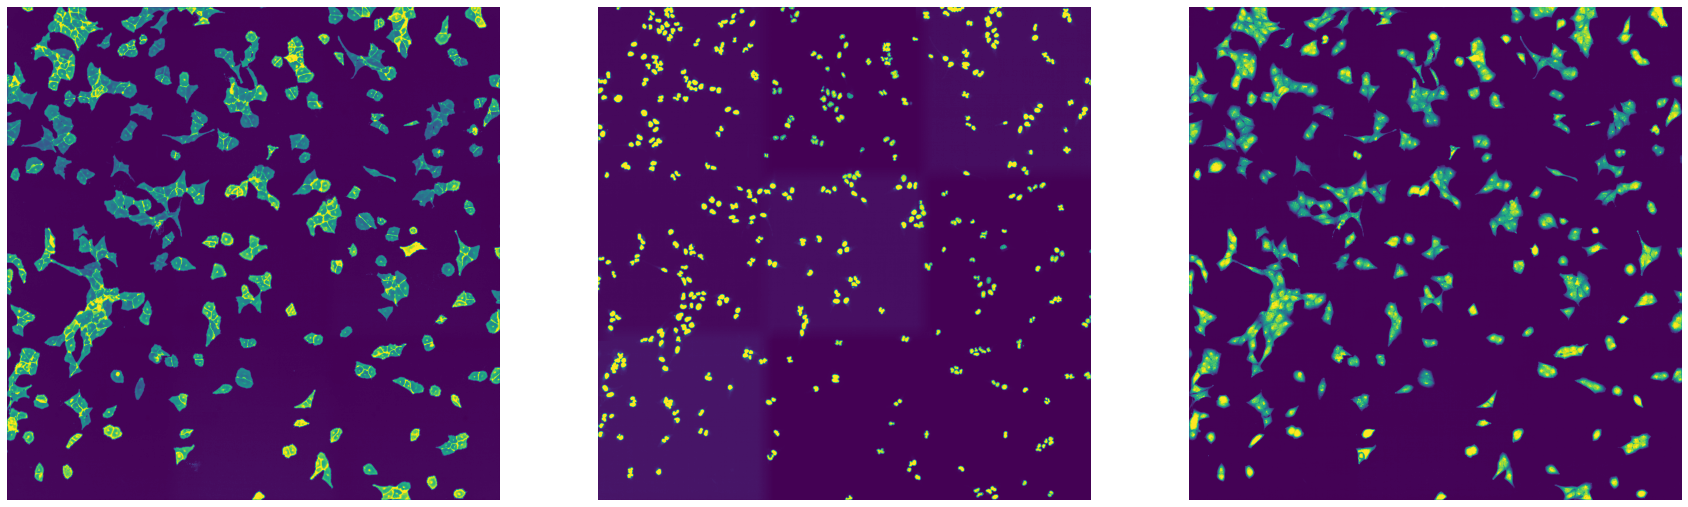

In [ ]:
import matplotlib.pyplot as plt
from tifffile import imread

fig, axs = plt.subplots(1, 3, figsize = (30, 10))
axs[0].imshow(imread(f"{outdir}/stitching_test_Alexa488.tif"))
axs[0].axis("off")

axs[1].imshow(imread(f"{outdir}/stitching_test_DAPI.tif"))
axs[1].axis("off")

axs[2].imshow(imread(f"{outdir}/stitching_test_mCherry.tif"))
axs[2].axis("off")